In [7]:
# Existing code

import pandas as pd

# New code to read the CSV file
df = pd.read_csv("E://LP VI//dl//1_boston_housing.csv")


df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
11/11 [==============================] - 2s 37ms/step - loss: 569.7192 - mae: 21.9861 - val_loss: 576.7084 - val_mae: 22.0082
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 511.2023 - mae: 20.5330 - val_loss: 498.2809 - val_mae: 20.0807
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 418.0051 - mae: 17.9865 - val_loss: 381.7003 - val_mae: 16.7600
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 295.5521 - mae: 14.2198 - val_loss: 244.5722 - val_mae: 12.0831
Epoch 5/100
11/11 [==============================] - 0s 11ms/step - loss: 181.9227 - mae: 10.5300 - val_loss: 151.0027 - val_mae: 8.6517
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 139.2544 - mae: 9.2128 - val_loss: 126.7115 - val_mae: 8.3328
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 122.3142 - mae: 8.5837 - val_loss: 114.1093 - val_mae: 7.8463
Epoch 8/100
11/11 [======================

In [15]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 4ms/step - loss: 21.4540 - mae: 2.9875
Mean squared error on test data:  21.45400619506836
Mean absolute error on test data:  2.9874985218048096


5/5 [==============================] - 0s 2ms/step


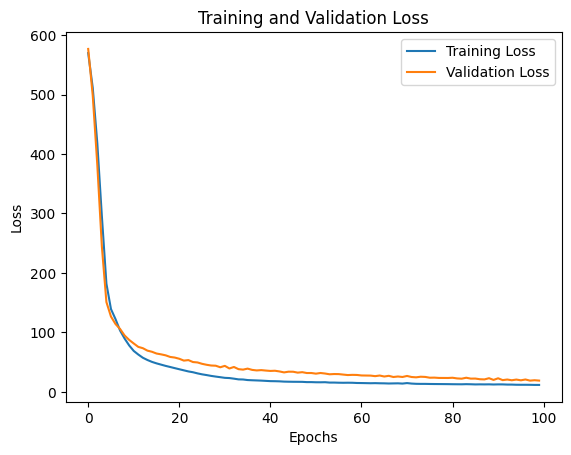

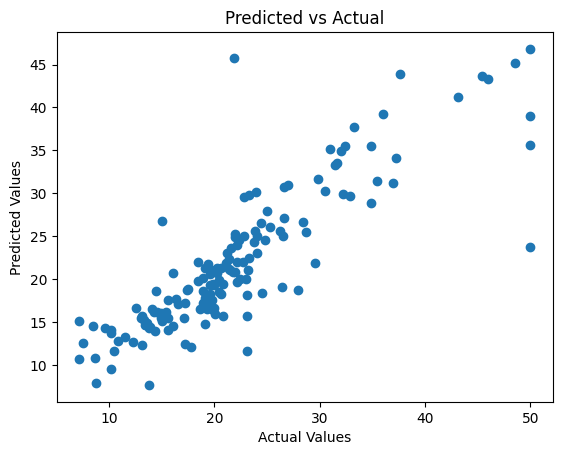

In [22]:
# Predict on test data
predictions = model.predict(X_test)

# 1. Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2. Scatter Plot of Predicted vs Actual Values
plt.scatter(y_test, predictions)
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


